In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np

# fetch_mldata downloads data in the file structure scikit_learn_data/mldata/mnist-original.mat
# in your home directory.
# you can also copy from our dataset using rsync -avz /cxldata/scikit_learn_data .
# mnist = fetch_mldata("MNIST original")
mnist = fetch_openml('mnist_784', version=1, cache=True)

### Looking into our Datasets

Out datasets consists of 70,000 images and each image has 784 features. A image consists of 28x28 pixels, and each pixel is a value from 0 to 255 describing the pixel intensity. 0 for white and 255 for black.


![MNIST dataset image](https://www.cntk.ai/jup/cntk103a_MNIST_input.png)

In [ ]:
X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy()
X.shape

(70000, 784)

Since there are 70,000 images with 28x28 pixels


In [ ]:
y.shape

(70000,)

This is label for each of the image. Since there are 70,000 images, hence there are 70,000 labels.

### Looking at one of the datasamples

To view the image of a single digit,all we need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s imshow() function.

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

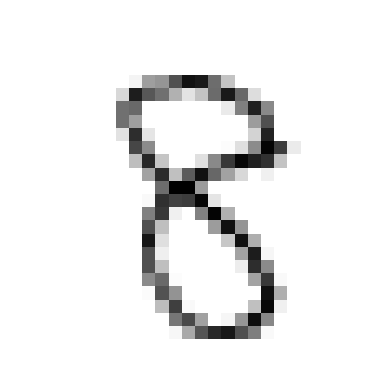

In [ ]:
some_digit = X[3600]   # Selecting the 3600th image.
some_digit_image = some_digit.reshape(28, 28) # Reshaping it to get the 28x28 pixels
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()

In [ ]:
some_digit_image.shape

(28, 28)

In [ ]:
X[3600].shape

(784,)

In [ ]:
y[3600]

'8'

## Test train split

> Train set is the data on which our Machine learning model is trained.

> Test set is the data on which our model is finally evaluated

![Test Train Split](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Machine_learning_nutshell_--_Split_into_train-test_set.svg/640px-Machine_learning_nutshell_--_Split_into_train-test_set.svg.png)

We need to split the data into test and train data. The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images)


In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


# **Go back to slides**

# **Binary Classification**
## Classifying our Digits

### Training a Binary Classifier

A perfect binary classifier looks something like this.
![Binary Classifier](https://classeval.files.wordpress.com/2015/06/perfect-classifier.png?w=480&h=192)

Let us first simplify our problem and make a model that only predicts if the digit is 5 or not. This will be a example of a "Binary Classifier".

Lets create target vector for our classification.

Also we need to **shuffle** our training data so that it ensures that we don't miss out any digit in a cross validation fold.

In [ ]:
y_train_8= y_train == '8'
y_test_8= y_test == '8'

In [ ]:
print(np.count_nonzero(y_train_8))
print(np.count_nonzero(y_test_8))
print(y_train_8[3600])

5851
974
True


Now let’s pick a classifier and train it. A good place to start is with a **Stochastic Gradient Descent (SGD)** classifier, using **Scikit-Learn’s SGDClassifier class**. This classifier has the advantage of being
capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning). Let’s create an **SGDClassifier** and train it on an example set:

Now, for binary classification '8' and 'Not 8', we train the SGD Classifier on the training dataset.

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=10) # if you want reproducible results set the random_state value.
sgd_clf.fit(X_train, y_train_8)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=10, random_state=42)

### Testing using sample data
We remember that a digit 8 was stored in some_digit and we test the classifier on this sample data

Since it gives a output of **True**, hence our binary classifier correctly identified the digit 8 from our dataset.

In [ ]:
sgd_clf.predict([X[3600]])

array([ True])

In [ ]:
y[3600]

'8'

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3)
y_train_pred

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([False, False, False, ..., False, False,  True])

## Measuring the performace of our Classifier

Evaluating a classifier is often significantly trickier than evaluating a regressor.

________
+ **Measuring Accuracy Using Cross-Validation**
______________
We will use the cross_val_score() function to evaluate your **SGDClassifier model** using **K-fold cross-
validation**, with three folds. **K-fold cross-validation** means splitting the training set into K-folds (in this case, three), then making predictions and evaluating them on each fold using a model trained on the remaining folds.

Here is a example how a 10 fold cross validation works.

![A 10 fold cross validation](https://sebastianraschka.com/images/faq/evaluate-a-model/k-fold.png)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_8, cv=3, scoring="accuracy")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.8955, 0.9178, 0.936 ])

____________
+ **Measuring performace using a Confusion Matrix**
____________



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_8, y_train_pred)

array([[52054,  2095],
       [ 2919,  2932]])

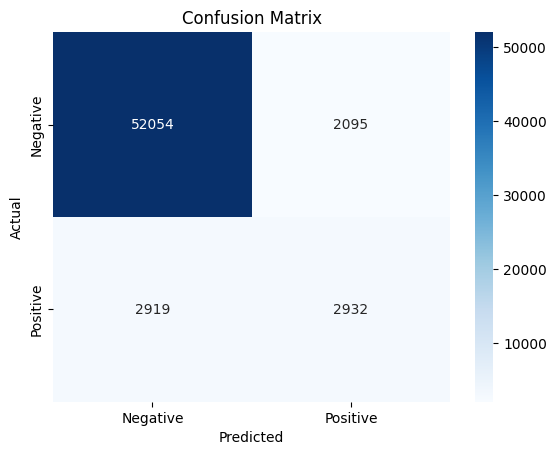

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_train_8, y_train_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Customize the axis ticks
class_names = ['Negative', 'Positive']
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Display the plot
plt.show()

Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation,
but instead of returning the evaluation scores, it returns the predictions made on each test fold

Each row in a confusion matrix represents an actual class, while each column represents a predicted class.

______________
+ **Measuring accuracy using Precision, Recall and F1 score**
________

In [ ]:
from sklearn.metrics import precision_score, recall_score

print ("Precision score is : " , precision_score(y_train_8, y_train_pred))
print ("Recall score is : " , recall_score(y_train_8, y_train_pred))

Precision score is :  0.5832504475830516
Recall score is :  0.5011109212100495


It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers. The F1 score is the harmonic mean of
precision and recall.


![F1 score](https://hassetukda.files.wordpress.com/2012/08/f12.jpg)

2/F1 = 1/recall + 1/precision

1. f1/2 < smaller of recall and precision


In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_8, y_train_pred)

0.5390696819268248

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([1235.10303855])

**Precision - Recall curve**

Let's try to find the score from the decision_function. Using these scores we will plot a relation between Precision and Recall, by setting different values of the Threshold.

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3,
method="decision_function")
len(y_scores)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


60000

In [ ]:
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2: #comes as 2 for logistic regrssion and linear regression, zeroth dimension is for negative class, first dimension is for positive class, we will go for 1 and look for positive class
    y_scores = y_scores[:, 1]

In [ ]:
from sklearn.metrics import precision_recall_curve
precision_recall_curve(y_train_8, y_scores)

(array([0.09751667, 0.09751829, 0.09751992, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.41821911e-04, 1.70910955e-04, 0.00000000e+00]),
 array([-1180444.59862308, -1163426.32675707, -1082137.11831286, ...,
          400356.63870881,   412488.9382906 ,   431961.48061614]))

In [ ]:
# Now we will use these values of y_scores to find different values for precison and recall for varying thresholds.

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_8, y_scores)


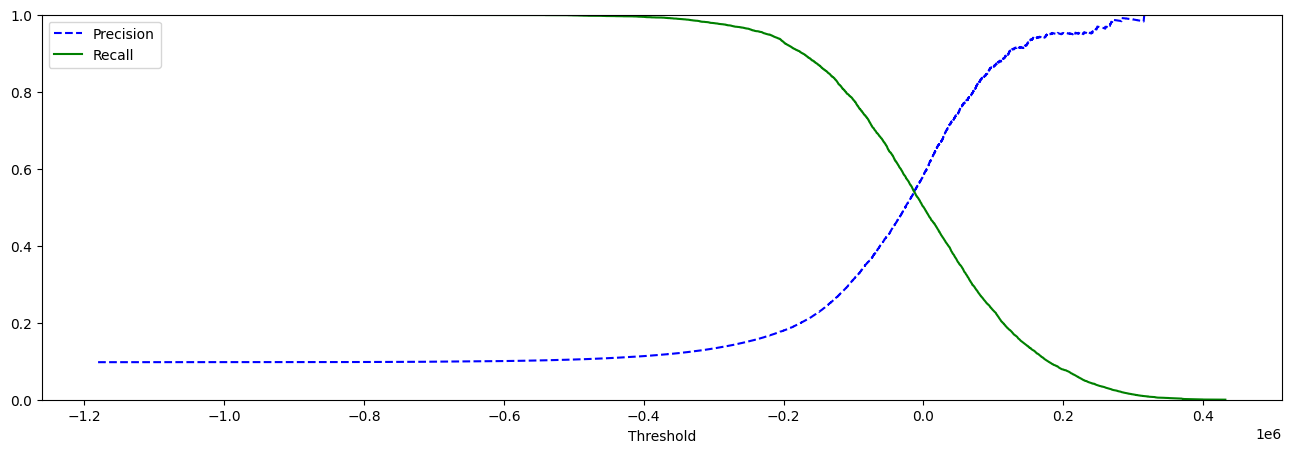

In [ ]:
# Plotting our results

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(16,5))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

**ROC curve**


> The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers.

> It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the **true positive rate (another name for recall)** against the **false positive rate**.

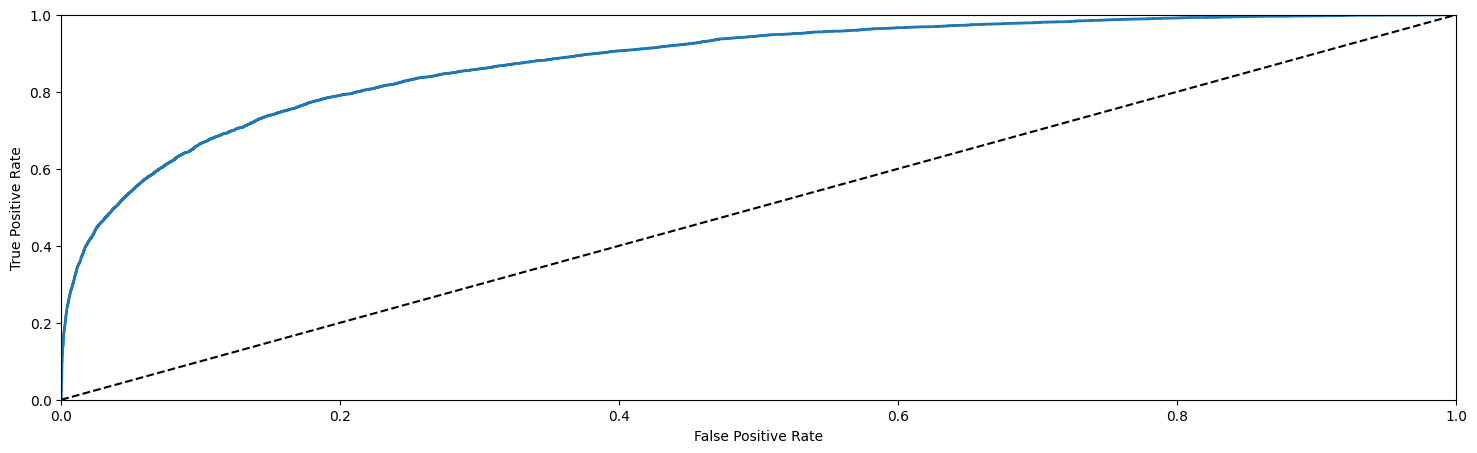

In [ ]:
# Making the ROC curve


from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_8, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(18,5))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
thresholds

array([              inf,   431961.48061614,   315889.57021238, ...,
        -734548.85980858,  -734771.36751779, -1180444.59862308])

In [ ]:
# Scikit-Learn provides a function to compute the ROC AUC:

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_8, y_scores)

0.8790860683665472

## Comparision of SGDClassifier and RandomForestClassifier on the basis of ROC-AUC

Let’s train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the
SGDClassifier.

First, you need to get scores for each instance in the training set. But due to the way it
works, the **RandomForestClassifier class** does not have a **decision_function()**
method. Instead it has a **predict_proba()** method.

Scikit-Learn classifiers generally have one or the other.

> The **predict_proba()** method returns an array containing a row per instance and a column per
class, each containing the probability that the given instance belongs to the given class (e.g., 70% chance that the image represents a 5):

### **Modelling of Ranom Forest**





In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_8, cv=3, method="predict_proba")
y_probas_forest

array([[0.98, 0.02],
       [1.  , 0.  ],
       [0.96, 0.04],
       ...,
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.29, 0.71]])

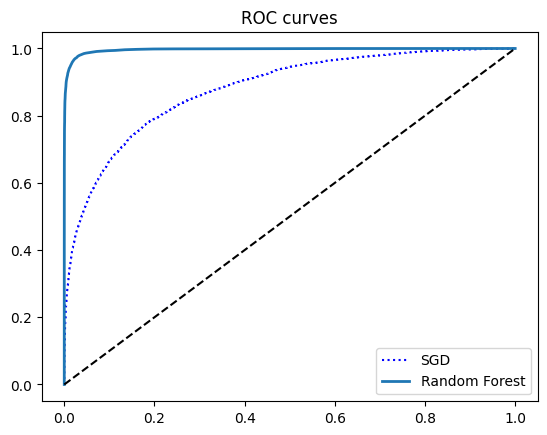

In [ ]:
# But to plot a ROC curve, you need scores, not probabilities.
# A simple solution is to use the positive class’s probability as the score:

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_8,y_scores_forest)

fig, ax = plt.subplots()
ax.plot(fpr, tpr, "b:", label="SGD")
ax.plot(fpr_forest, tpr_forest, linewidth=2, label="Random Forest")
ax.plot([0, 1], [0, 1], 'k--')
ax.legend(loc=4);
ax.set_title('ROC curves');


In [ ]:
# ROC auc score of SGDClassifier and RF

from sklearn.metrics import roc_auc_score
print ("The ROC AUC value for SGDClassifier : ", roc_auc_score(y_train_8, y_scores))
print ("The ROC AUC value for Random Forest Classifier is : " , roc_auc_score(y_train_8, y_scores_forest))

The ROC AUC value for SGDClassifier :  0.8790860683665472
The ROC AUC value for Random Forest Classifier is :  0.9965481456893603


In [ ]:
#Measuring accuracy for Random forest Classifier

from sklearn.model_selection import cross_val_score
cross_val_score(forest_clf, X_train, y_train_8, cv=10, scoring="accuracy")


array([0.98283333, 0.97816667, 0.981     , 0.98266667, 0.98266667,
       0.98316667, 0.982     , 0.97983333, 0.98316667, 0.9845    ])

In [ ]:
y_pred_forest = cross_val_predict(forest_clf, X_train, y_train_8, cv=10)
y_pred_forest

array([False, False, False, ..., False, False,  True])

In [ ]:
#Precision and Recall values for RandomForest
print ("Precision score is : " , precision_score(y_train_8, y_pred_forest))
print ("Recall score is : " , recall_score(y_train_8, y_pred_forest))

Precision score is :  0.990339157245632
Recall score is :  0.8234489830798154


In [ ]:
f1_score(y_train_8, y_pred_forest)

0.8992161254199328

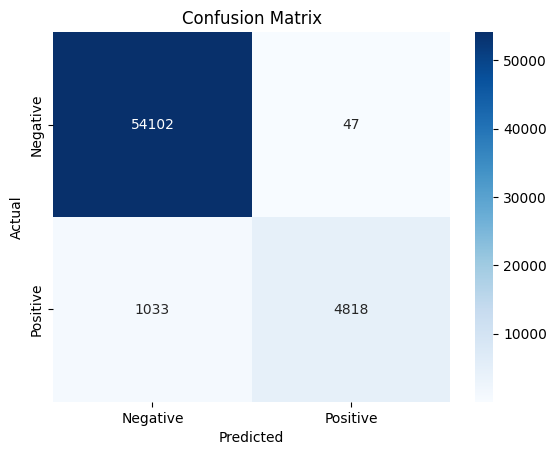

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_train_8, y_pred_forest)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Customize the axis ticks
class_names = ['Negative', 'Positive']
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Display the plot
plt.show()

## **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
y_pred_svm = cross_val_predict(svm_clf, X_train, y_train_8, cv=3)
y_pred_svm

array([False, False, False, ..., False, False,  True])

In [ ]:
print ("The ROC AUC value for SVM Classifier is : " , roc_auc_score(y_train_8, y_pred_svm))
#Precision and Recall values for RandomForest
print ("Precision score is : " , precision_score(y_train_8, y_pred_svm))
print ("Recall score is : " , recall_score(y_train_8, y_pred_svm))

The ROC AUC value for SVM Classifier is :  0.9656751153652104
Precision score is :  0.980606931226432
Recall score is :  0.9333447273970261


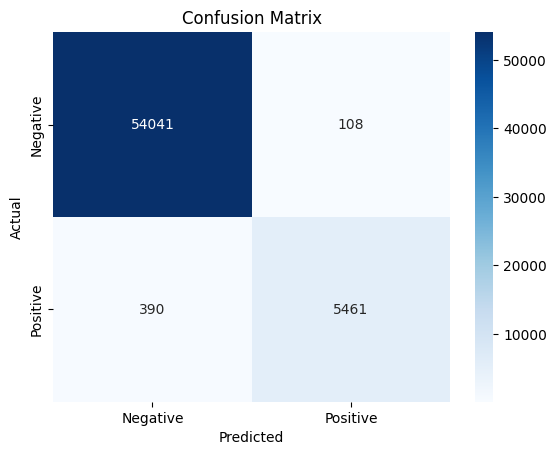

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_train_8, y_pred_svm)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Customize the axis ticks
class_names = ['Negative', 'Positive']
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Display the plot
plt.show()

## **K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=2)
y_pred_knn = cross_val_predict(svm_clf, X_train, y_train_8, cv=3)
y_pred_knn

array([False, False, False, ..., False, False,  True])

In [ ]:
print ("The ROC AUC value for SVM Classifier is : " , roc_auc_score(y_train_8, y_pred_knn))
#Precision and Recall values for RandomForest
print ("Precision score is : " , precision_score(y_train_8, y_pred_knn))
print ("Recall score is : " , recall_score(y_train_8, y_pred_knn))

The ROC AUC value for SVM Classifier is :  0.9656751153652104
Precision score is :  0.980606931226432
Recall score is :  0.9333447273970261


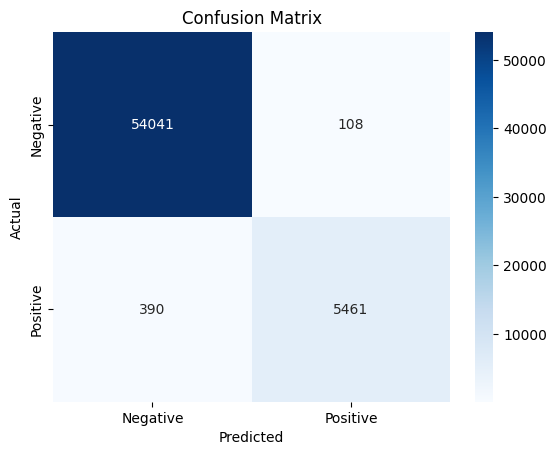

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_train_8, y_pred_knn)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Customize the axis ticks
class_names = ['Negative', 'Positive']
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Display the plot
plt.show()

In [ ]:
cross_val_score(svm_clf, X_train, y_train_8, cv=3, scoring="accuracy")


array([0.9909, 0.9928, 0.9914])

In [ ]:
cross_val_score(knn_clf, X_train, y_train_8, cv=10, scoring="accuracy")


array([0.99      , 0.986     , 0.987     , 0.98983333, 0.98733333,
       0.98733333, 0.98983333, 0.98683333, 0.98883333, 0.99166667])

In [ ]:
y_scores_svm = cross_val_predict(svm_clf, X_train, y_train_8, cv=3,
method="decision_function")
if y_scores_svm.ndim == 2:
  y_scores_svm=y_scores_svm[:,1]


In [ ]:
y_scores_knn = cross_val_predict(knn_clf, X_train, y_train_8, cv=3,
method="predict_proba")
if y_scores_knn.ndim == 2:
  y_scores_knn=y_scores_knn[:,1]

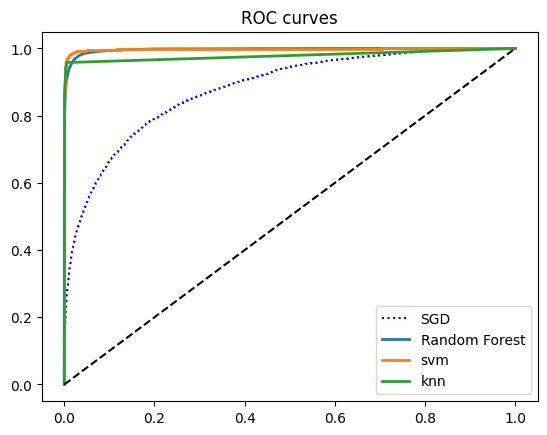

In [ ]:
# But to plot a ROC curve, you need scores, not probabilities.
# A simple solution is to use the positive class’s probability as the score:

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_train_8,y_scores_svm)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train_8,y_scores_knn)
fig, ax = plt.subplots()
ax.plot(fpr, tpr, "b:", label="SGD")
ax.plot(fpr_forest, tpr_forest, linewidth=2, label="Random Forest")
ax.plot(fpr_svm, tpr_svm, linewidth=2, label="svm")
ax.plot(fpr_knn, tpr_knn, linewidth=2, label="knn")
ax.plot([0, 1], [0, 1], 'k--')
ax.legend(loc=4);
ax.set_title('ROC curves');

### **Multiclass Classifiaction**